# PFAS Toolbox

### Libraries Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Data Import

In [4]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [50]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/ConnieRdz/PFAS Database Sample.xlsx'
#Specify sheet name
sheet_name = 'All'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop,Sampling Location
0,INTL PAPER-4/6/2023 10:30 AM-10:2Fluorotelomer...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,2023-04-06 10:30:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<0.760,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
1,INTL PAPER-4/6/2023 10:30 AM-11Cl-PF3OUdS (Rep...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
2,INTL PAPER-4/6/2023 10:30 AM-4:2Fluorotelomers...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
3,INTL PAPER-4/6/2023 10:30 AM-8:2Fluorotelomers...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<0.570,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
4,INTL PAPER-4/6/2023 10:30 AM-9Cl-PF3ONS (Report),421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,9Cl-PF3ONS (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall


### Import PFAS Compounds Attributes

In [50]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [51]:
df_PFAS_Attributes.head()

,CAS,Official Full Name,Eurofins Reports (at least as of April 2023),Sample Manager,Database,WasteManagement,Longest Carbon Chain Length,Abbrev,Abbev2,C,...,H,N,S,Cl,Atomic mass,% Flourine Equivalents,Class (1633),Chain Class,EPA Method 1633,EPA Method 537.1
0,120226-60-0,"1H,1H,2H,2H-Perfloruorododecanesulphonic acid",10:2 FTS,10:2Fluorotelomersulfonic Acid (Report),10:2Fluorotelomersulfonic acid,10:2 FTS ...,12.0,10:2FTS,10:2FTS,12.0,...,5.0,0.0,1.0,0.0,628.20,0.635148,Fluorotelomer Sulfonic Acid,Long,NaN,X
1,763051-92-9,11-Chloroeicosafluoro-3-oxaundecane-1-sulfonic...,11Cl-PF3OUdS,11Cl-PF3OUdS (Report),11Cl-PF3OUdS,F-53B Minor ...,10.0,11Cl-PF3OUdS,11Cl-PF3,10.0,...,1.0,0.0,1.0,1.0,632.60,0.600696,Ether Sulfonic Acid,Long,X,X
2,356-02-5,3-Perfluoropropyl propanoic acid,3:3 FTCA,3:3 FTCA (Report),3:3 FTCA,3:3FTCA,6.0,3:3FTCA,3:3FTCA,6.0,...,5.0,0.0,0.0,0.0,242.09,0.549382,Fluorotelomer Carboxylic Acid,Short,X,NaN
3,757124-72-4,"1H,1H,2H,2H-Perfluorohexane sulfonic acid",4:2 Fluorotelomer sulfonic acid,4:2Fluorotelomersulfonic Acid (Report),4:2 Fluorotelomersulfonic acid,4:2 FTS ...,6.0,4:2FTS,4:2FTS,6.0,...,5.0,0.0,1.0,0.0,328.15,0.521103,Fluorotelomer Sulfonic Acid,Short,X,X
4,914637-49-3,"2H,2H,3H,3H-Perfluorooctanoic acid",5:3 FTCA,5:3 FTCA (Report),5:3 FTCA,5:3FTCA,8.0,5:3FTCA,5:3FTCA,8.0,...,5.0,0.0,0.0,0.0,342.11,0.610915,Fluorotelomer Carboxylic Acid,Long,X,NaN


### Bar Chart - Compare PFAS Compound Concentrations

In [4]:
def create_grouped_bar_chart(data_df, category_column, value_column, sub_group_column=None,
                             title=None, ylabel=None, figsize=None, xlabel=None):
    """
    Create a grouped bar chart with customizable title, y-axis label, figure size, and horizontal lines using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        category_column (str): The column to use as categories/groups on the x-axis.
        value_column (str): The column to use for values on the y-axis.
        sub_group_column (str, optional): The column to use for grouping the data into subcategories.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        xlabel (str, optional): The label for the x-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart.

        Note: The value will be returned as the average value for the given category (PFAS compound) and 
        subcategory (either a sampling location or before/after sampling). Eg. it will return the mean value
        for all samples in the category. 
    """
    try:
        # Check if the group_column exists in the DataFrame
        if sub_group_column in data_df.columns:
            # Group data by 'PFAS Compound' and 'Sampling Location', and calculate the sum of values for each group
            grouped_data = data_df.groupby([category_column, sub_group_column])[value_column].mean().unstack(fill_value=0)
            
            # Create a grouped bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (12, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=0, ax=ax)
            plt.xlabel(xlabel or category_column)
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Grouped Bar Chart of {value_column} by {category_column} and {group_column}')
            plt.legend(title=sub_group_column)
        else:
            # If no group_column is provided, use only category_column for grouping
            grouped_data = data_df.groupby(category_column)[value_column].mean()

            # Create a regular bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (10, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=45, ax=ax)
            plt.xlabel(xlabel or category_column)
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Bar Chart of {value_column} by {category_column}')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add horizontal gridlines
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


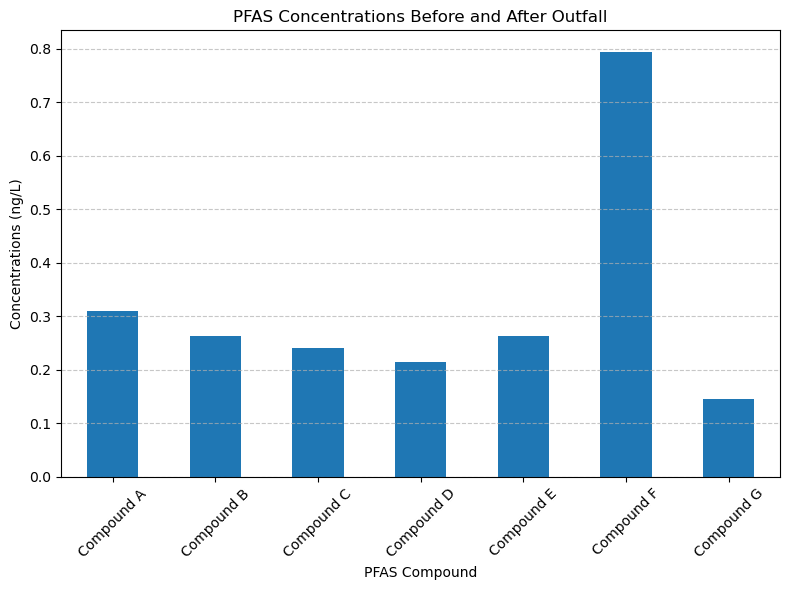

In [97]:
# Example Compare PFAS Compound Concentrations(No subcategories)

#Specify Category_column (str): The column to use as categories/groups on the x-axis.
#You may use the 'PFAS Compound'column; However, this will result in long labels for each category.
#It is recommended to create a new column with PFAS compound abbreviations to use as labels.
category_column = 'PFAS Compound (Abbrev.)'

#Specify value_column (str): The column to use for values on the y-axis.
#(Eg. 'Quant Only Incl Qual Flags', 'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags')
value_column='All (w BDL= MDL/2) Incl Qual Flags'

#Specify title (str, optional): The title for the chart. 
#By dafault the title will be 'Bar Chart of'+'value_column'+'by'+category_column
title='PFAS Concentrations Before and After Outfall'

#Specify ylabel (str, optional): The label for the y-axis. By default it will use the value_column name.
ylabel='Concentrations (ng/L)'

#Specify xlabel (str, optional): The label for the x-axis. By default it will use the category_column name.
xlabel='PFAS Compound'

#Specify figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(8,6)

# Create a bar chart using the 'PFAS Compound' column as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, category_column=category_column, value_column=value_column, title=title,
                        ylabel=ylabel, xlabel=xlabel,figsize=figsize)

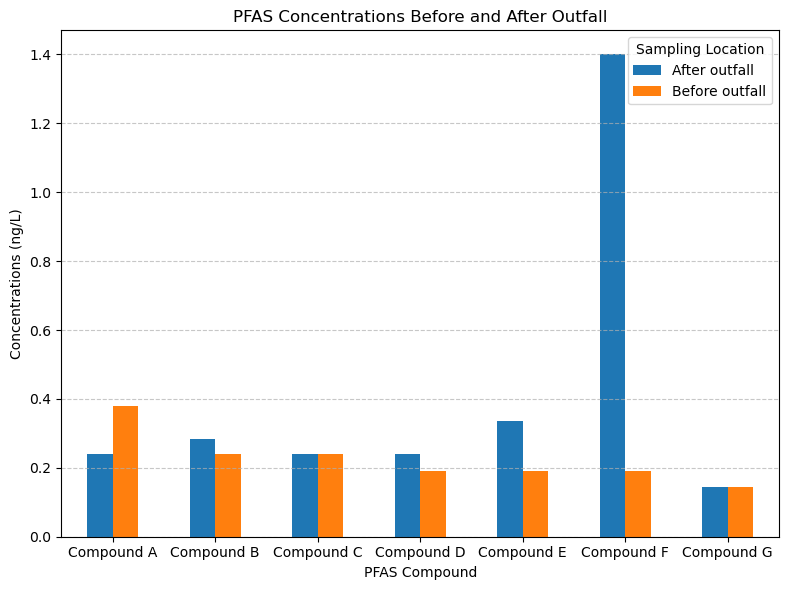

In [10]:
# Example Compare PFAS Compound Concentrations with subcategories (Different sampling locations)

#Specify Category_column (str): The column to use as categories/groups on the x-axis.
#You may use the 'PFAS Compound'column; However, this will result in long labels for each category.
#It is recommended to create a new column with PFAS compound abbreviations to use as labels.
category_column = 'PFAS Compound (Abbrev.)'

#Specify value_column (str): The column to use for values on the y-axis.
#(Eg. 'Quant Only Incl Qual Flags', 'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags')
value_column='All (w BDL= MDL/2) Incl Qual Flags'

#Specify sub_group_column (str, optional): The column to use for grouping the data into subcategories.
#This column may represent different sampling locations or sampling on different dates (before/after).
sub_group_column='Sampling Location'

#Specify title (str, optional): The title for the chart. 
#By dafault the title will be 'Bar Chart of'+'value_column'+'by'+category_column
title='PFAS Concentrations Before and After Outfall'

#Specify ylabel (str, optional): The label for the y-axis. By default it will use the value_column name.
ylabel='Concentrations (ng/L)'

#Specify xlabel (str, optional): The label for the x-axis. By default it will use the category_column name.
xlabel='PFAS Compound'

#Specify figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(8,6)

# Create a bar chart using 'PFAS Compound' as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, category_column=category_column, value_column=value_column, 
                        sub_group_column=sub_group_column, title=title, ylabel=ylabel,
                        xlabel=xlabel, figsize=figsize)

### Number of Samples per Year

#### Create Pivot Table

In [37]:
def create_pivot_table(data_df, filter_pfas_compound=None):
    """
    Create a pivot table with customizable PFAS Compound filter using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table.
    """
    try:
        # Filter the data based on the provided PFAS Compound values if filter_pfas_compound is not None
        if filter_pfas_compound:
            filtered_data = data_df[data_df['PFAS Compound'].isin(filter_pfas_compound)]
        else:
            filtered_data = data_df

        # Extract the year from 'Sampled Date' column and create a new 'Year' column
        filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year

        # Create a pivot table with 'Year' as index, 'Type' as columns, and sum of values as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags', index='Year', columns='Type', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [45]:
# Example - How to create a pivot table for number of sampler each year
#Specify filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).
filter_pfas_compound = ['Perfluorohexadecanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid']

# Create a pivot table with or without the PFAS Compound filter
pivot_table = create_pivot_table(data_df, filter_pfas_compound)
pivot_table

C:\Users\rodriguezc\AppData\Local\Temp\ipykernel_34664\2633616885.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year


Type,Influent,Manhole,Outfall of Industry
Year,,,
2019,2,0,0
2020,1,1,0
2023,0,0,2


#### Create Bar Chart for Number of Samples per Year

In [41]:
def create_stacked_bar_chart(pivot_table, title=None, ylabel=None):
    """
    Create a stacked bar chart using a pivot table with years as x-labels and counts for each Type as stacked bars.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing counts for each year and Type.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Create a stacked bar chart
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        pivot_table.plot(kind='bar', stacked=True, rot=0)
        plt.xlabel('Year')
        plt.ylabel(ylabel or 'Sample Count')
        plt.title(title or 'Stacked Bar Chart of Sample Counts by Year and Type')
        plt.legend(title='Type')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

<Figure size 1000x600 with 0 Axes>

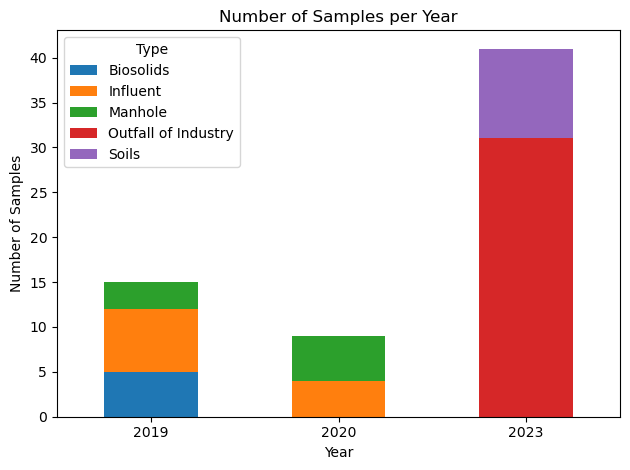

In [49]:
# Example usage: Create a stack bar shart for number of samples per year

# The function expect a pivot table. Please use the create_pivot_table function from 
# the previous example.
pivot_table = create_pivot_table(data_df, filter_pfas_compound=None)

#Specify a title (str, optional): The title for the chart.
title='Number of Samples per Year'
#Specify a ylabel (str, optional): The label for the y-axis.
ylabel='Number of Samples'

# Create a stacked bar chart with custom title and y-axis label
create_stacked_bar_chart(pivot_table, title=title, ylabel=ylabel)

### Compare PFAS Concentrations and Composition at Various Sites

#### Import Data to use for this section.

In [75]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Pivot Table for Average PFAS Compound Concentrations at Various Sites

In [38]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [141]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
avg_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,5.625000,4.000000,0.182500,0.000000,0.500000,0.900000,10.950000,0.225000,0.000000,4.450000,6.650000,0.000000,8.650000
Fanno at Durham Rd,0.000000,5.600000,4.100000,1.300000,0.000000,2.900000,5.000000,5.900000,1.100000,0.380000,14.000000,7.300000,0.580000,6.200000
Rock @ Brookwood,0.000000,4.900000,4.400000,0.960000,0.000000,2.100000,3.300000,5.000000,0.940000,0.370000,9.700000,5.000000,0.380000,5.900000
Thomas Dairy B-2 Pore Water,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,5.300000,16.000000,0.000000,15.000000,21.000000,9.400000,0.000000,9.700000
Thomas Dairy Control Site Well,0.000000,5.766667,5.300000,0.000000,0.083333,1.320000,9.933333,5.133333,0.216667,0.096667,4.466667,5.600000,0.960000,4.630000
Thomas Dairy Site 1 Well,0.223333,3.550000,4.700000,0.133333,0.000000,0.693333,5.233333,1.766667,0.283333,0.203333,5.900000,3.766667,0.600000,1.800000
Thomas Dairy Site 2 Well,0.000000,3.866667,5.133333,0.000000,0.000000,0.000000,6.266667,0.433333,0.146667,0.120000,4.933333,2.400000,0.733333,0.426667
Thomas Dairy Site 3 Well,0.000000,4.433333,4.766667,0.000000,0.000000,1.633333,6.566667,4.966667,0.143333,0.000000,3.400000,6.433333,0.720000,6.233333


#### Create Pivot Table for Count of PFAS Compound Concentrations at Various Sites

In [42]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [86]:
# Example usage with filters: Create pivot table for count of PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
count_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,4,5,5,5,5,5,5,5,5,5,5,5,5,5
Fanno at Durham Rd,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rock @ Brookwood,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy B-2 Pore Water,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 2 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 3 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3


#### Create Pivot Table with Sampling Count for Each Compount at Each Site

In [112]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [140]:

# Specify data_df (pd.DataFrame): The DataFrame containing the data.
data_df=data_df

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'
# Create a custom standard deviation pivot table with multiple filters
std_dev_pivot_table = create_std_dev_pivot_table_with_filters(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
std_dev_pivot_table


PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,2.904307,4.604346,0.326466,0.000000,0.894427,1.103177,5.443620,0.402492,0.000000,3.461647,3.183080,0.000000,4.535085
Thomas Dairy Control Site Well,0.000000,3.106981,3.477068,0.000000,0.144338,0.919348,1.847521,4.579665,0.192959,0.167432,1.234234,3.983717,0.069282,3.252799
Thomas Dairy Site 1 Well,0.386825,0.665833,1.732051,0.230940,0.000000,0.160728,0.808290,0.585947,0.136504,0.176730,1.819341,1.266228,0.040000,0.346410
Thomas Dairy Site 2 Well,0.000000,1.350309,1.250333,0.000000,0.000000,0.000000,0.808290,0.750555,0.127410,0.207846,1.011599,0.529150,0.151438,0.127410
Thomas Dairy Site 3 Well,0.000000,0.862168,0.665833,0.000000,0.000000,0.288675,1.001665,0.832666,0.125033,0.692820,0.871780,0.665833,0.141774,0.907377


#### Stacked Bar Chart with Error Bars

In [144]:

def create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6)):
    """
    Create a stacked bar chart based on average PFAS concentrations pivot table with one bar per sample location.

    Args:
        avg_pivot_table (pd.DataFrame): The average PFAS concentrations pivot table.
        std_dev_pivot_table (pd.DataFrame, optional): The standard deviation pivot table (default is None).
        figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).

    Returns:
        None (displays the chart).
    """
    try:
        # Align the rows of avg_pivot_table and std_dev_pivot_table based on Sample Locations
        if std_dev_pivot_table is not None:
            merged_tables = avg_pivot_table.join(std_dev_pivot_table, how='left', rsuffix='_std_dev')
        else:
            merged_tables = avg_pivot_table

        categories = merged_tables.index
        compounds = avg_pivot_table.columns
        num_categories = len(categories)

        # Create the stacked bar chart with specified figsize
        fig, ax = plt.subplots(figsize=figsize)

        width = 0.35
        x = np.arange(num_categories)

        bottom = np.zeros(num_categories)

        for i, compound in enumerate(compounds):
            avg_values = merged_tables[compound]
            error_bars = merged_tables[f"{compound}_std_dev"] if std_dev_pivot_table is not None else None

            if error_bars is not None and not error_bars.isnull().all():
                ax.bar(x, avg_values, width, label=compound, bottom=bottom, yerr=error_bars, capsize=5)
            else:
                ax.bar(x, avg_values, width, label=compound, bottom=bottom)

            bottom += avg_values

        ax.set_xlabel('Sample Location')
        ax.set_ylabel('Average Concentration (ng/L)')
        ax.set_title('Average PFAS Concentrations by Sample Location')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend(title='PFAS Compound')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

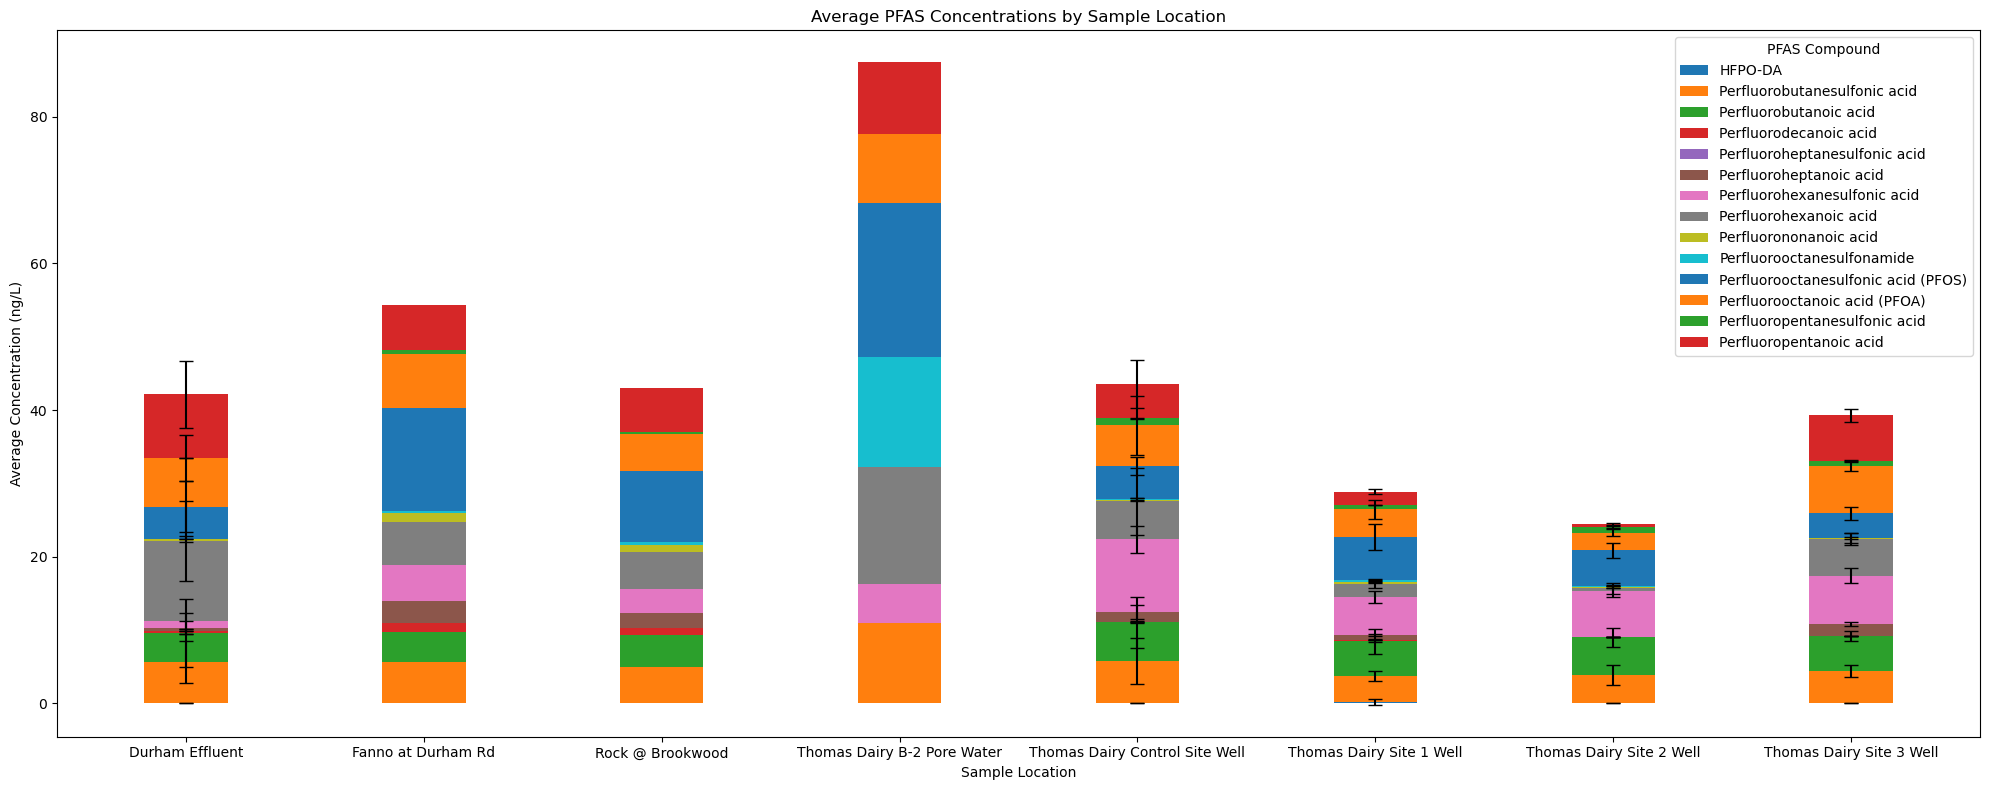

In [145]:
# Example: Create the stacked bar chart with custom figsize and error bars

#avg_pivot_table (pd.DataFrame): The average PFAS concentrations pivot table.
#std_dev_pivot_table (pd.DataFrame, optional): The standard deviation pivot table (default is None).
#figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).

create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table, figsize=(20, 8))  # Adjust figsize as needed


### Create Pivot Table for Average Concentration of each PFAS Compounds Samples Taken Each Day

#### Import Data to use for this section.

In [13]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Function

In [30]:
def create_custom_pivot_table(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'Sample Location',
    'Sample Date', 'PFAS Compounds', and 'Sample Location'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Apply filters based on 'PFAS Compounds'
        if filter_pfas_compounds:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compounds)]

        # Apply filter based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Date' as columns, 'PFAS Compound' as rows, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Date',
                                     aggfunc='mean', fill_value='N/A')

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

#### Usage Example: Create Pivot Table Averaging PFAS Concentrations for PFAS Compound, Grouping by Sampling Date

In [32]:
# Usage example

# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date ='2019-01-01'
#end_date (str, optional): End date for the date range filter (default is None).
end_date ='2020-12-30'
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
#filter_pfas_compounds =
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Influent']

# Create the custom pivot table
custom_pivot_table = create_custom_pivot_table(data_df, filter_qual_summary, start_date=start_date, end_date=end_date,filter_sample_location=filter_sample_location)

# Display the custom pivot table
custom_pivot_table

Sample Date,2019-08-22,2019-11-04,2020-01-23,2020-04-23,2020-06-12,2020-09-23,2020-12-10
PFAS Compound,,,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFPO-DA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEtFOSA,N/A,N/A,0.0,0.0,0.0,0.0,0.0


#### Save Pivot Table in CSV File for Inspection

In [26]:
# Assuming you have a custom_pivot_table DataFrame that you want to save to a CSV file
custom_pivot_table.to_csv('pivot_table.csv')

#This will output the folder location where the file will be saved.
ls

### TOP Assay Results Pivot Table and Bar Chart for PFAS Compound Pre and Post at Various Locations

#### Import data for section

In [65]:
# Import data for this section examples.

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Function for Pivot Table

In [41]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average 'All (w BDL= MDL/2) Incl Qual Flags'
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average 'All (w BDL= MDL/2) Incl Qual Flags' values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average 'All (w BDL= MDL/2) Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value='N/A')

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None
   


#### Example usage: Create Pivot Table for Average Concentrations of Various PFAS Compounds and Different Sites

In [66]:
# Filter criteria
        
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date = '2023-04-06'
#end_date (str, optional): End date for the date range filter (default is None).
end_date = '2023-06-07'
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent','Influent']
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
filter_pfas_compounds = None
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = None

# Create the custom pivot table with sample location filter
custom_pivot_table = create_custom_pivot_table_with_filters(data_df, filter_qual_summary, start_date, end_date,filter_type, filter_pfas_compounds, filter_sample_location)

# Display the custom pivot table
custom_pivot_table


Sample Location,Durham Effluent,Durham Influent,Forest Grove Effluent,Forest Grove Influent,Hillsboro Effluent,Hillsboro Influent,Rock Creek Effluent,Rock Creek Influent
PFAS Compound,,,,,,,,
10:2Fluorotelomersulfonic acid,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
11Cl-PF3OUdS,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
4:2 Fluorotelomersulfonic acid,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
8:2 Fluorotelomersulfonic acid,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9Cl-PF3ONS,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
...,...,...,...,...,...,...,...,...
TOP-Perfluoropentanesulfonic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
TOP-Perfluoropentanoic acid,11.0,18.0,12.0,28.0,10.0,23.0,12.0,30.0
TOP-Perfluorotetradecanoic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


#### Create Function to Create Table for Concentrations in  mol/L

In [101]:
import pandas as pd

def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    and populate 'Sample Location Pre-TOP' columns based on pivot_table_pre_top.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and 'Abbrev'.
        pivot_table_pre_top (pd.DataFrame): The pivot table containing values for 'Pre-TOP'.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" populated.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table_pre_top
        for location in sample_locations:
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: pivot_table_pre_top.at[x, location] if x in pivot_table_pre_top.index else None
            )

        # Create columns with suffixes "Post-TOP" (filled with null values)
        for location in sample_locations:
            compound_table[f'{location} Post-TOP'] = None

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [103]:
#### Need to fix
def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    populate 'Sample Location Pre-TOP' columns based on pivot_table_pre_top, and calculate adjusted values.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length',
                                          'Abbrev', and '% Fluorine Equivalents'.
        pivot_table_pre_top (pd.DataFrame): The pivot table containing values for 'Pre-TOP'.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" populated and adjusted values.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table_pre_top
        for location in sample_locations:
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: pivot_table_pre_top.at[x, location] if x in pivot_table_pre_top.index else None
            )

        # Create columns with suffixes "Post-TOP" (filled with null values)
        for location in sample_locations:
            compound_table[f'{location} Post-TOP'] = None
        

        # Calculate adjusted values based on '% Fluorine Equivalents' and divide by 19
        compound_table['Adjusted Value'] = compound_table['PFAS Compound'].apply(
            lambda x: (df_PFAS_Attributes[df_PFAS_Attributes['Database'] == x]['% Flourine Equivalents'].values[0] * compound_table.at[compound_table['PFAS Compound'] == x, f'{location} Pre-TOP'].values[0]) / 19 if x in df_PFAS_Attributes['Database'].values else None
        )

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None




In [102]:

PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent']
pivot_table_pre_top=custom_pivot_table

create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)

,PFAS Compound,Longest Carbon Chain Length,Abbreviation,Forest Grove Influent Pre-TOP,Forest Grove Effluent Pre-TOP,Forest Grove Influent Post-TOP,Forest Grove Effluent Post-TOP
19,Perfluorobutanesulfonic acid,4.0,PFBS,7.7,7.3,None,None
20,Perfluorobutanoic acid,4.0,PFBA,10.0,10.0,None,None
26,Perfluoroheptanoic acid,7.0,PFHpA,2.5,2.5,None,None
29,Perfluorohexanoic acid,6.0,PFHxA,4.5,17.0,None,None
31,Perfluorononanoic acid,9.0,PFNA,2.5,2.5,None,None
34,Perfluorooctanesulfonic acid (PFOS),8.0,PFOS,5.0,5.0,None,None
35,Perfluorooctanoic acid (PFOA),8.0,PFOA,2.5,2.5,None,None
37,Perfluoropentanoic acid,5.0,PFPeA,2.5,5.4,None,None


In [98]:
df_PFAS_Attributes.columns

Index(['CAS', 'Official Full Name',
       'Eurofins Reports (at least as of April 2023)', 'Sample Manager',
       'Database', 'WasteManagement', 'Longest Carbon Chain Length', 'Abbrev',
       'Abbev2', 'C', 'F', 'O', 'H', 'N', 'S', 'Cl', 'Atomic mass',
       '% Flourine Equivalents', 'Class (1633)', 'Chain Class',
       'EPA Method 1633', 'EPA Method 537.1'],
      dtype='object')

#### Bar Chart of PFAS Concentrations in mol/L - (NOT DONE)